In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from fractions import Fraction 
import matplotlib.pyplot as plt

Implementamos el algoritmo para el caso de r=2 y entrada de 2 bits es decir que $x\in{1,2,3,4}$


Circuito inicial:


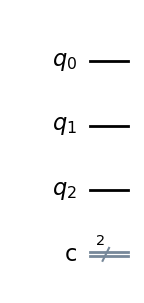

estado inicial


<IPython.core.display.Latex object>

In [3]:
t=2
L=1
N=2**t
shots = 1024
#primero creamos un circuito con t+L qubits, los t primeros son los preparados inicialmente y los que evolucionan
#los L qubits son los de salida
qc=QuantumCircuit(t+L,t)
x_qubits = list(range(t))  # qubits 0 y 1
y_qubit = t                # qubit 2


print("Circuito inicial:")
display(qc.draw("mpl"))
state = Statevector.from_instruction(qc)
print("estado inicial")
state.draw(output='latex')


🔹 Después de aplicar Hadamard a qubits de entrada:


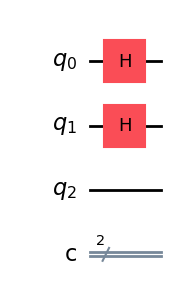

Estado después de Hadamards:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In [4]:
#Ahora aplico hadamart al registro de entradas
qc.h(x_qubits)
print("🔹 Después de aplicar Hadamard a qubits de entrada:")
display(qc.draw("mpl"))
state = Statevector.from_instruction(qc)
print("Estado después de Hadamards:")
print(state)
state.draw(output='latex')


Después de aplicar el oráculo (f(x) = f(x + 2)):


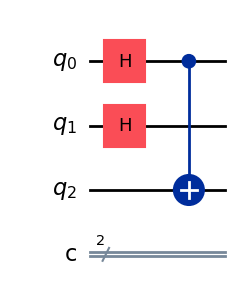

Estado después del oraculo:
Statevector([0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
             0.5+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In [5]:
#aplicamos la compuerta C-Not
qc.cx(x_qubits[0],y_qubit)
print("Después de aplicar el oráculo (f(x) = f(x + 2)):")
display(qc.draw("mpl")) 
state = Statevector.from_instruction(qc)
print("Estado después del oraculo:")
print(state)
state.draw(output='latex')


Después de aplicar la QFT inversa:


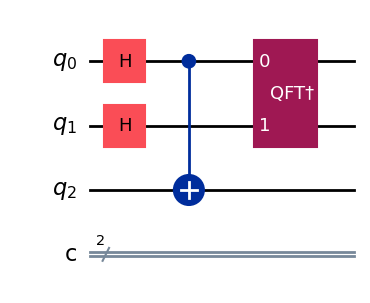

Estado después de la QFT inversa:
Statevector([ 0.5+0.j,  0. +0.j,  0.5+0.j,  0. +0.j,  0.5+0.j,  0. +0.j,
             -0.5+0.j,  0. +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In [6]:
#Ahora aplicamos QFT al primer registro
qft_inv = QFT(num_qubits=t, inverse=True, do_swaps=True).to_gate()
qft_inv.name = "QFT†"
qc.append(qft_inv, x_qubits)

print("Después de aplicar la QFT inversa:")
display(qc.draw("mpl"))
state = Statevector.from_instruction(qc)
print("Estado después de la QFT inversa:")
print(state)
state.draw(output='latex')


Después de medir los qubits de entrada:


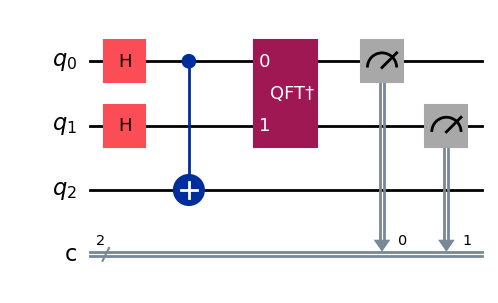

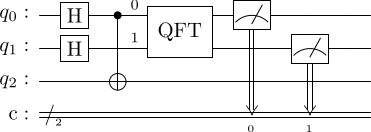

In [7]:

qc.measure(x_qubits, range(t))
print("Después de medir los qubits de entrada:")
display(qc.draw("mpl"))
qc.draw(output="latex")

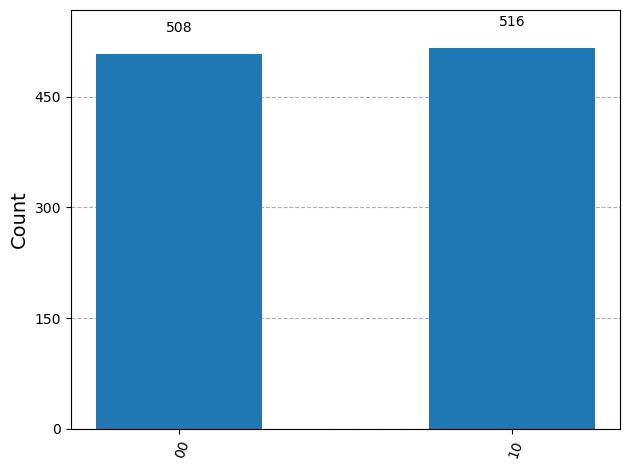

In [8]:
backend = Aer.get_backend('qasm_simulator')
compiled= transpile(qc, backend)
job = backend.run(compiled, shots=shots) 
counts = job.result().get_counts()

plot_histogram(counts)


In [9]:
measured_binary = max(counts, key=counts.get)
measured_decimal= int(measured_binary, 2)
c_over_N= measured_decimal/N
approx_fraction = Fraction(c_over_N).limit_denominator(N)
r_estimate = approx_fraction.denominator

print(f"Valor medido: {measured_binary} (decimal {measured_decimal})")
print(f"Aproximacion : {approx_fraction}, r: {r_estimate}")

Valor medido: 10 (decimal 2)
Aproximacion : 1/2, r: 2
